In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# Perceptron

In [678]:
def train_test_split(df,p=0.8,random_state=None):

    df_split=df.sample(frac=1,random_state=random_state)   #shuffle 
    split_val=int(len(df_split)*(p))   #split into train and test
    n=len(df_split.columns)  #number of features

    X_train=df_split[:split_val].to_numpy()[:,:n-1] 
    y_train=df_split[:split_val].to_numpy()[:,n-1]
    X_test=df_split[split_val:].to_numpy()[:,:n-1]
    y_test=df_split[split_val:].to_numpy()[:,n-1]
    
    return X_train,X_test,y_train,y_test

In [679]:
def test_acc(X_test,y_test,w):

    pred=[] #list of predictions by the model
    for xn in X_test: #the line wT.x_n=0 should separate the positive and negative classes
        if np.dot(w[-1],xn)>0: #if predicted value is greater than 0
            pred.append(1) #positive prediction
        else:
            pred.append(-1) #negative prediction
    
    pred=np.array(pred)
    f_score= Fscore(pred,y_test) #calculate f-score for the current predictions
    
    return f_score

In [680]:
def Fscore(pred,y_test):
    
    pos_idx=np.where(pred==1)  #positive predictions by the model
    TP=sum(y_test[pos_idx]==1) #true positives, prediction is +ve and actual class is +ve
    FP=sum(y_test[pos_idx]==-1) #false positives, prediction is -ve and actual class is -ve
    neg_idx=np.where(pred==-1) #negative predictions by the model
    TN=sum(y_test[neg_idx]==-1) #true negatives, prediction is -ve and actual class is -ve
    FN=sum(y_test[neg_idx]==1) #false negative, prediction is -ve and actual class is +ve
    
    p=TP/(TP+FP) #precision
    r=TP/(TP+FN) #recall
    f_score= (2*p*r)/(p+r)
    #f_score= TP/(TP+(0.5*(FP+FN)))
    return f_score

In [681]:
def perceptron(X_train,X_test,y_train,y_test,eta=0.2,k=10,epsilon=8, max_iters=10000,print_iter=False):
    
    w=np.random.randn(1,X_train.shape[1]) #initial weights, randomly sampled from SND
    t=0 #starting time=0                                  
    converged=False  #check if algorithm has converged     
    
    #eta->learning rate
    #k->last k values to check for convergence
    #epsilon->check if change is greater than epsilon 

    while not converged:

        idx=np.random.randint(low=0,high=X_train.shape[0])  #randomly select values from training data set   
        (xn,yn)=X_train[idx],y_train[idx]  

        if yn*np.dot(w[t],xn)<0: #check if prediction is incorrect
            new_w=w[t]+ eta*yn*xn  #increase/decrease w value based on yn and xn
            w=np.vstack((w,new_w))  #store w values
            t+=1 #increase in time

        if t>k:  #check for convergence
            if np.sum(abs(w[-k:]-w[-1]))<epsilon:  #if value has not changed by epsilon
                converged = True  #algorithm has converged

            elif t>max_iters: #max iterations if not converged
                converged=True
    
    if print_iter==True:
        print(f'The value converged in {t} iterations.')
    
    f_score=test_acc(X_test,y_test,w)
    
    return f_score

In [682]:
def k_fold(X_train_og,y_train_og,k_fold=10,eta=0.3,k=10,epsilon=8, max_iters=5000, print_iter=False):
    f_scores=[]

    for i in range(k_fold):   #iterative split for k_fold times

        X=copy.deepcopy(X_train_og)  #store original X  and y values
        y=copy.deepcopy(y_train_og)

        start=i*int(len(X_train_og)/k_fold)  #split the array into train and test according to the specified length             
        end=(i+1)*int(len(X_train_og)/k_fold)

        X_validate=X[start:end] #validation  set             
        y_validate=y[start:end]

        X_train=np.delete(X,np.arange(start,end),0)  #train set (total set without the validation set) 
        y_train=np.delete(y,np.arange(start,end),0)

        f_score=perceptron(X_train,X_validate,y_train,y_validate,eta=eta,k=k,epsilon=epsilon, max_iters=max_iters, print_iter=print_iter)  #predict for each split
        f_scores.append(f_score) #store f-scores on each iteration

    return np.mean(f_score) #return the average f-score

### Pre-processsing of data

In [673]:
df=pd.read_csv('BankNote_Authentication.csv')
df['class'][df['class']==0]=-1 #set 0 class values to -1, for compatibility with the perceptron algorithm
df

<ipython-input-673-2f3d7fa7338e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][df['class']==0]=-1 #set 0 class values to -1, for compatibility with the perceptron algorithm


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#### Checking for missing values

In [661]:
for col in  df.columns:
    print(col,df[col][df[col]==None],df[col][df[col]==0.])

variance Series([], Name: variance, dtype: float64) Series([], Name: variance, dtype: float64)
skewness Series([], Name: skewness, dtype: float64) Series([], Name: skewness, dtype: float64)
curtosis Series([], Name: curtosis, dtype: float64) Series([], Name: curtosis, dtype: float64)
entropy Series([], Name: entropy, dtype: float64) Series([], Name: entropy, dtype: float64)
class Series([], Name: class, dtype: int64) Series([], Name: class, dtype: int64)


There seem to be no missing values in the dataset as empty series are returned when checked for None or 0 values in the series.  
The series is made up of float and integer values, as indicated by the dtype, showing there are no string values as placeholders for missing values.

#### Checking for outliers

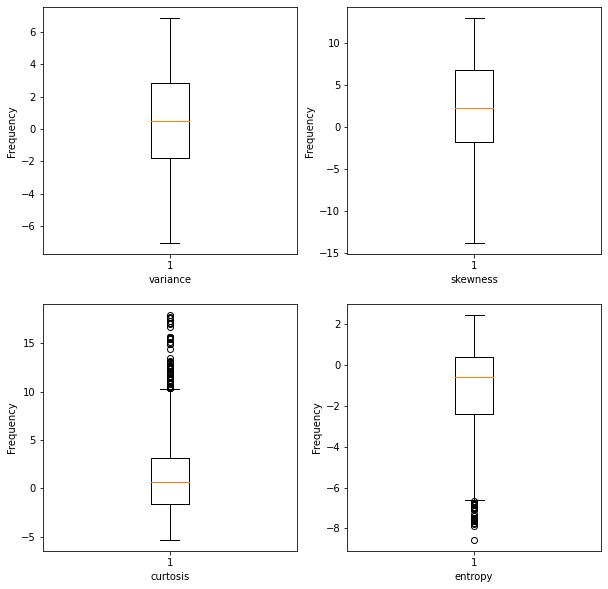

In [662]:
fig,axs=plt.subplots(2,2,figsize=(10,10))
cols=df.columns

for i in range (axs.shape[0]):
    for j in range (axs.shape[1]):
        data=cols[(i*2)+j]
        axs[i][j].boxplot(df[data])
        axs[i][j].set_xlabel(data)
        axs[i][j].set_ylabel('Frequency')

The boxplots show us that variance and skewness datasets seem to be evenly distributed and do not have many outliers. 
The curtosis and entropy distributions seem to be skewed to the right and left, respectively and have outliers greater than 9 and lower than -6.

In [663]:
a=np.where(df['curtosis']>9) #index of values greater than 9
b=np.where(df['entropy']<-6) #index of values lower than -6
outliers=np.unique(np.append(a,b)) #total set of outliers
df=df.drop(outliers) #drop outliers from dataset

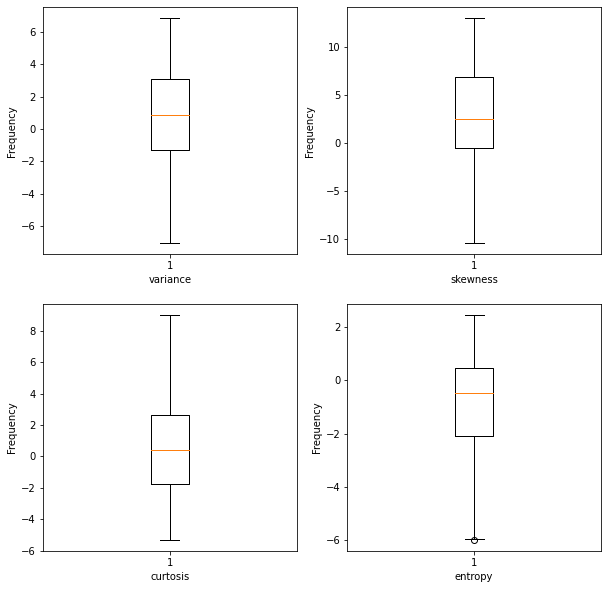

In [664]:
fig,axs=plt.subplots(2,2,figsize=(10,10))
cols=df.columns

for i in range (axs.shape[0]):
    for j in range (axs.shape[1]):
        data=cols[(i*2)+j]
        axs[i][j].boxplot(df[data])
        axs[i][j].set_xlabel(data)
        axs[i][j].set_ylabel('Frequency')

After dropping the outliers from the dataset, the boxplots show us that the distributions are not skewed anymore.  

#### Cross-validated error using default hyperparameter values

In [706]:
X_train,X_test,y_train,y_test=train_test_split(df)
f_score=k_fold(X_train,y_train,k_fold=5,eta=1,k=10,epsilon=10, max_iters=1000)
print(f'Validation set f_score={f_score}')

Validation set f_score=0.9494949494949494


As we can see, the validation set accuracy using random hyperparameter values is quite high. 

### Selecting Hyperparameter values

In [708]:
n=10

epsilons=np.linspace(0.1,10,num=n)
eps_f_scores=[]

etas=np.linspace(0.1,1,num=n)
eta_f_scores=[]

k_s=np.linspace(1,50,num=n, dtype=int)
k_f_scores=[]

max_iters=np.linspace(100,10000,num=n)
iters_f_scores=[]

for i in range(n):
    
    eps_f_scores.append(k_fold(X_train,y_train,k_fold=5,eta=1,k=10,epsilon=epsilons[i], max_iters=1000))
    eta_f_scores.append(k_fold(X_train,y_train,k_fold=5,eta=etas[i],k=10,epsilon=10, max_iters=1000))
    k_f_scores.append(k_fold(X_train,y_train,k_fold=5,eta=1,k=k_s[i],epsilon=10, max_iters=1000))
    iters_f_scores.append(k_fold(X_train,y_train,k_fold=5,eta=1,k=10,epsilon=10, max_iters=max_iters[i]))

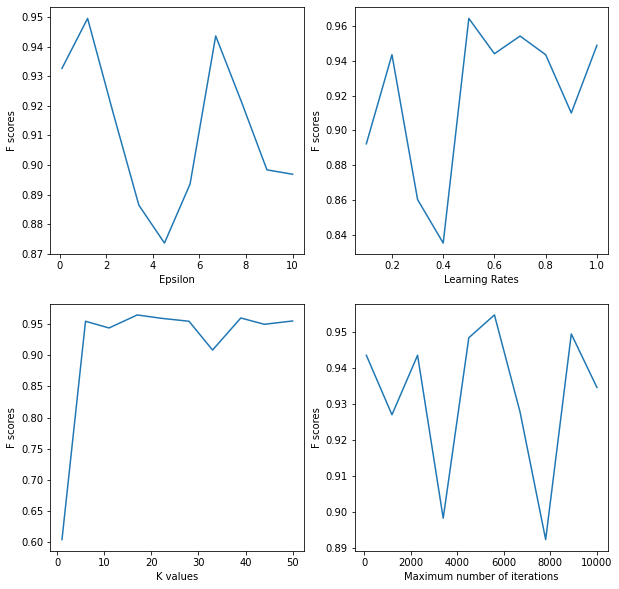

In [709]:
fig,axs=plt.subplots(2,2,figsize=(10,10))
labels=['Epsilon','Learning Rates','K values','Maximum number of iterations']
data=[(epsilons,eps_f_scores),(etas,eta_f_scores),(k_s,k_f_scores),(max_iters,iters_f_scores)]

for i in range (axs.shape[0]):
    for j in range (axs.shape[1]):
        idx=(i*2)+j
        axs[i][j].plot(data[idx][0],data[idx][1])
        axs[i][j].set_xlabel(labels[idx])
        axs[i][j].set_ylabel('F scores')

The f scores for epsilon and learning rates are largely similar and do not have much variance. The trend seen in both the plots is similar as well with the f scores rising initially, dropping off and rising again. The f scores for the small (1-10) k values and then level off at higher values, indicating that a higher k-value would be a safe bet. The f-scores for maximum number of iterations also do not seem to have much variance and a moderate value would seem to be a good choice.   

In [716]:
f_score=perceptron(X_train,X_test,y_train,y_test,eta=0.6,k=20,epsilon=6, max_iters=5000)
print(f'Test set f score using cross-validated hyperparameter values={f_score}')

Test set f score using cross-validated hyperparameter values=0.9119170984455958


There does not seem to be a high rise in the f-score after handpicking the hyperparameter values.

# Bayesian  inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Using Bayesian inference, we want to arrive at a distribution over the parameter values $\mu$, given data $X$, $p(\mu|X)$.  
In the current example, we are working in a setting where conjugacy is possible using normal likelihood and priors, which gives us a normal posterior distribution. We are also using a constant variance value ($\sigma^2$) for ease of calculation.

Normal distribution pdf  
$ f(x) = \frac{1}{\sigma \sqrt {2\pi}} e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2 }  $  

In [2]:
def f(x,mu,sigma):
    if (type(mu)==int) or (type(mu)==np.float64) or (type(mu)==float):
        return (1/(sigma*np.sqrt(2*np.pi))) * np.e**((-1/2)*((x-mu)/sigma)**2) 
    else:
        return (1/(sigma*np.sqrt(2*np.pi))) * np.e**((-1/2)*(np.sum((x-mu.T),axis=1)/sigma)**2)

### Prior

The prior distribution can be represented as $p(\mu|\mu_0,\sigma_0^2)$, or the probability that $\mu$ takes a particular value $\mu_i$ , $p(\mu=\mu_i)$ given that the parameters of the (normal) prior distribution are $\mu_0$ and $\sigma_0^2$. The values for $\mu_0$ and $\sigma_0^2$ are to be chosen by the modeler depending on previous experience, intuition, etc. If we do not have/want to incorporate prior knowledge, we can use a 'vague' prior with $\mu_0 = 0$ and $\sigma_0^2$ as a large value, indicating a lack of confidence in our prior estimate.   
Since we are using a normal distribution, $p(\mu|\mu_0,\sigma_0) =\frac{1}{\sigma_0 \sqrt {2\pi}} e^{-\frac{1}{2} (\frac{\mu-\mu_0}{\sigma_0})^2 }$  
Setting $\mu_0=25$ and $\sigma_0=5$, we get $p(\mu|\mu_0=25,\sigma_0=5) =\frac{1}{5 \sqrt {2\pi}} e^{-\frac{1}{2} (\frac{\mu-25}{5})^2 }$

In [3]:
def prior_calc(mu,sigma,start=-10,stop=40,num=10000,plot=False):
    theta = np.linspace(start,stop,num=num)
    prior = f(theta,mu=mu,sigma=sigma)
    if plot:
        plt.plot(theta,prior)
        plt.xlabel('Parameter (mu) values')
        plt.ylabel('Probabilities')
        plt.title('Prior')
    return theta,prior

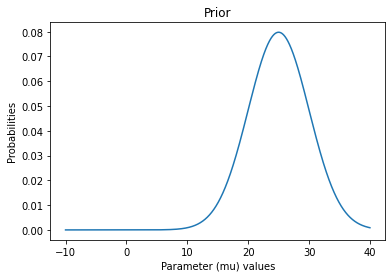

In [4]:
mu_0=25
sigma_0=5
theta,prior=prior_calc(mu=mu_0,sigma=sigma_0, plot=True)

### Likelihood

We are using a normal likelihood function to calculate the likelihood of the data $X$, given the parameter values $(\mu,\sigma)$. Since the value of $\sigma$ is treated as a constant, we are interested in the likelihood of the data given $\mu$, and the function can be represented as $p(x_1,x_2,x_3....x_n|\mu)$.

#### Data

50 data points are generated from a normal distribution with $(\mu,\sigma) = (10,5)$.

In [54]:
X=np.random.normal(loc=10, scale=5, size=50)
X

array([11.93867735,  4.84985014, 16.38856687, 12.14982872,  9.09091266,
        2.71588632,  7.49955531, 13.7443991 ,  8.29912155,  6.38442778,
       13.05392278, 11.66815322,  9.67735086, 12.80935115,  4.2832976 ,
       13.93920346,  7.26877297, 13.78870128, 11.92686028, 10.02739879,
       13.2985299 ,  8.35558951, -0.19188506, 11.74711931, 14.3559389 ,
       15.63200647, 15.20040043,  7.53256198, 12.1760794 , 19.00378702,
       13.75759508, -3.08578227,  5.37524566,  9.29449201,  6.57779862,
       10.48819114, 11.3263663 ,  7.21652064, 16.60929576, 12.14161263,
        8.73028813, 10.64408565, 17.99834336,  2.63177201, -2.30314092,
        8.27580824,  8.82155888, 13.01116493, 13.37560006,  6.03369366])

For multiple data points $(n>1)$ which are independently distributed, the sample mean $(\bar{x})$ can be used to obtain the likelihood function.

$p(x_1,x_2,x_3....x_n|\mu) \sim N(\mu,\sigma^2) \rightarrow p(\bar{x}|\mu) \sim N(\mu,\frac{\sigma^2}{n})$   
$p(x_1,x_2,x_3....x_n|\mu)\propto \frac{1}{\sigma \sqrt {2\pi}} e^{-\frac{1}{2} \sum_i^n(\frac{x_i-\mu}{\sigma})^2 } $  
$\propto e^{-\frac{1}{2\sigma^2} (\sum_i^n x_i^2+n\mu^2 - 2\mu\sum_i^n x_i) } \times \frac{n}{n}$  
$\propto e^{-\frac{n}{2\sigma^2} (\bar{x^2}+ \mu^2 - 2\mu \bar{x}) }$  
$\propto e^{-\frac{n}{2\sigma^2} (\bar{x}- \mu)^2 }$  
$\propto p(\bar{x}|\mu)$

In [53]:
def likelihood_calc(X,sigma,theta,type,plot=False):
    
    if type=='Product':    
        likelihood=[]
        for m in theta:
            likelihood.append(np.prod(f(x=X,mu=m,sigma=sigma)))
        likelihood/=sum(likelihood) 
    elif type=='Log':
        likelihood=[]
        for m in theta:
            likelihood.append(np.sum(np.log(f(x=X,mu=m,sigma=sigma))))
    elif type=='MLE':
        mu= np.mean(X)
        sigma=sigma/np.sqrt(len(X))
        likelihood=f(theta,mu,sigma)         
    if plot:
        plt.plot(theta,likelihood)
        plt.xlabel('Parameter values')
        if type=='log':
            plt.ylabel('Log likelihood')
        else:
            plt.ylabel('Probabilities')
        plt.show()

    return likelihood

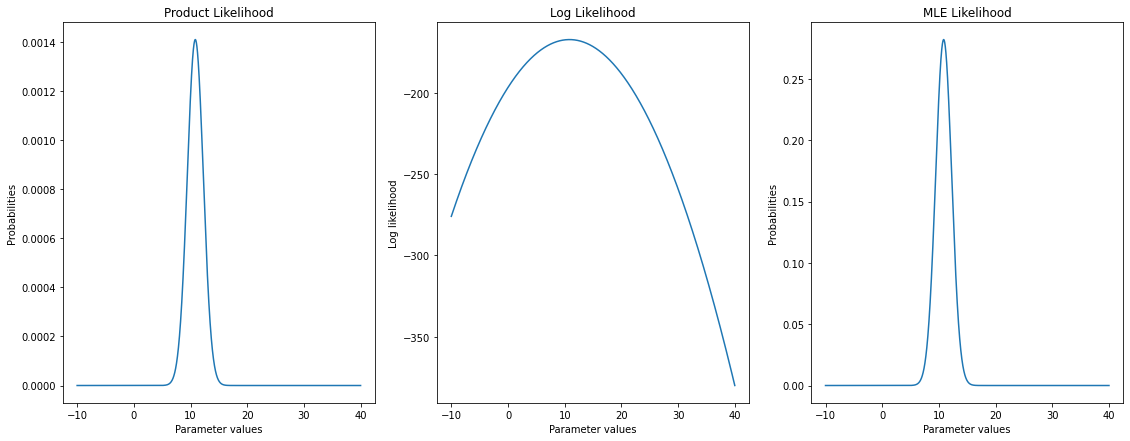

In [43]:
fig,axs=plt.subplots(1,3, figsize=(19,7))
types=['Product','Log','MLE']
sigma=10 #the chosen sigma value 

for i in range(3):
    axs[i].plot(theta,likelihood_calc(X,sigma,theta,type=types[i]))
    axs[i].set_xlabel('Parameter values')
    if types[i]=='Log':
        axs[i].set_ylabel('Log likelihood')
    else:
        axs[i].set_ylabel('Probabilities')
    axs[i].set_title(f'{types[i]} Likelihood')
likelihood=likelihood_calc(X,sigma,theta,type='MLE')

As we can see, the shape of the likelihood function derived using the product and the MLE methods are identical.The log likelihood shows greater uncertainty over the parameter values.

### Posterior

The analytical solution for the posterior is dependent on the number of samples $(n)$ and the parameters of the prior $(\mu_0, \sigma_0)$ and likelihood $(\bar{x},\sigma)$ distributions. Therefore, $p(\mu|x_1,x_2,x_3....x_n)=p(\mu|\bar{x})$.  
The posterior probability can be represented as,  
$p(\mu|\bar{x})\sim N ( (\frac {\sigma^2 \mu_0 + \sigma_0^2n\bar{x}}{n\sigma_0^2 + \sigma^2}), (\frac{\sigma^2\sigma_0^2}{n\sigma_0^2 + \sigma^2}) )$

In [44]:
def posterior_calc(theta,prior,likelihood, solution='Numeric',mu_0=None,sigma_0=None,sigma=None,plot=False):
    
    if solution=='Numeric':
        posterior=(likelihood*prior)/sum(likelihood*prior)
    elif solution=='Analytical':
        x_=theta[np.argmax(likelihood)] #the mode/mean of the likelihood distribution 
        n=len(X) 
        mu= ( sigma**2 * mu_0  + sigma_0**2*n*x_ )/( n*sigma_0**2 + sigma**2 )  #analytic mu value
        std=(sigma**2 * sigma_0**2)/( n*sigma_0**2 + sigma**2 ) #analytic sigma value
        posterior=f(theta,mu,std) 
    elif solution=='MCMC':
        MCMC_post=MCMC(X,theta,prior,sigma)  #get MCMC samples
        mu_mc=np.mean(MCMC_post)  
        sigma_mc=np.std(MCMC_post)
        posterior=f(theta,mu_mc,sigma_mc) #normal distribution around MCMC samples
    if plot:
        plt.plot(theta,posterior)
        plt.xlabel('Theta values')
        plt.ylabel('Probabilities')
        plt.title('Posterior')
    
    return posterior

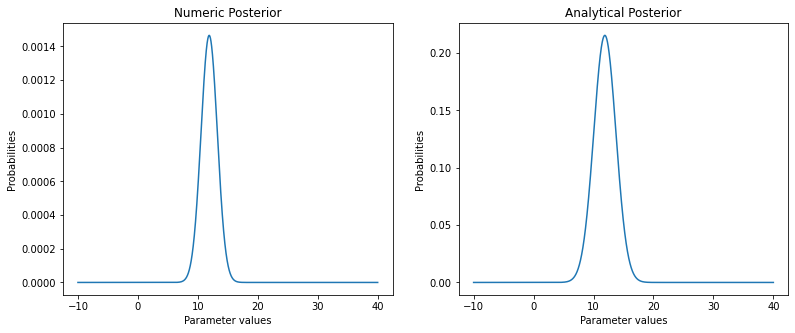

In [45]:
fig,axs=plt.subplots(1,2, figsize=(13,5))
types=['Numeric','Analytical']

for i in range(2):
    axs[i].plot(theta,posterior_calc(theta,prior,likelihood,solution=types[i],mu_0=mu_0,sigma_0=sigma_0,sigma=sigma))
    axs[i].set_xlabel('Parameter values')
    axs[i].set_ylabel('Probabilities')
    axs[i].set_title(f'{types[i]} Posterior')

The analytical and numeric posterior seem to be hovering around the same area. However, it is not feasible to calculate the posterior numerically in situations where the parameter space is very large, like multivariate distributions.

#### Summary

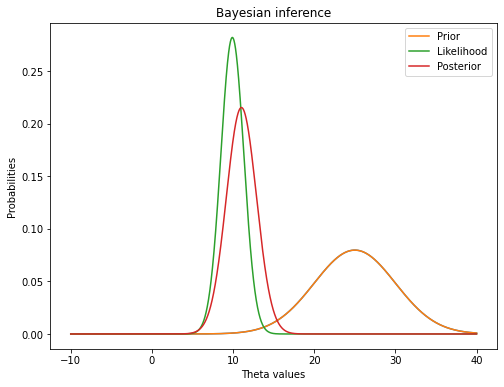

In [60]:
plt.figure(figsize=(8,6))

mu_0=25
sigma_0=5
simga=10

theta,prior=prior_calc(mu=mu_0,sigma=sigma_0, plot=True) #calculate prior
likelihood=likelihood_calc(X,sigma,theta,type='MLE') #calculate likelihood
aly_posterior=posterior_calc(theta,prior,likelihood,solution='Analytical',mu_0=mu_0,sigma_0=sigma_0,sigma=sigma) #calculate posterior
plt.plot(theta,prior,label='Prior')
plt.plot(theta,likelihood,label='Likelihood')
plt.plot(theta,aly_posterior,label='Posterior')

plt.xlabel('Theta values')
plt.ylabel('Probabilities')
plt.title('Bayesian inference')
plt.legend()

The posterior is a compromise between the duelling likelihood and prior distributions.

### Metropolis algorithm

In [46]:
def proposed_move(theta_curr,theta, prop_width, mu=0.0): 
    done=False
    while not done:
        prop=np.random.normal(loc=mu, scale=prop_width, size=None) #proposal distribution, deciding where the next move could be
        theta_prop=theta_curr+prop #add the proposal to current position in parameter space
        if min(theta)<=theta_prop<=max(theta): #if value is not out of bounds
            theta_prop=theta.flat[np.abs(theta - theta_prop).argmin()]  #closest value to proposed value
            done=True
    return theta_prop

def P_theta_calc(X,th,theta,prior, mu=None,sigma=None):
    
    likelihood=np.prod(f(X, th, sigma)) #likelihood of current parameter value
    theta_idx=np.where(theta == th) #idx of current parameter value
    P_theta=likelihood*prior[theta_idx] #the denominator p(X) is not required as we are taking a ratio of P(theta)
    return P_theta

def decide_move(P_theta_prop,P_theta_curr,theta_prop,theta_curr):
    pmove=min((P_theta_prop/P_theta_curr),1) #cap probability of moving at 1
    if pmove>np.random.uniform(low=0.0, high=1.0): 
        theta_curr=theta_prop #accept_move
    return theta_curr

In [47]:
def MCMC(X,theta,prior,sigma, prop_width, num_iter=1000):
  #  theta_curr=np.random.choice(theta, size=None, replace=True) #initialise starting point randomly
    #initialise starting point as MLE
    mu=np.mean(X) 
    theta_curr=theta.flat[np.abs(theta - mu).argmin()] #closest possible value to actual mean
    posterior=[]
    for i in range(num_iter):
        theta_prop=proposed_move(theta_curr,theta, prop_width) #get proposed move
        P_theta_curr=P_theta_calc(X,th=theta_curr,theta=theta, sigma=sigma, prior=prior) #get non-normalised probabilities
        P_theta_prop=P_theta_calc(X,th=theta_prop,theta=theta, sigma=sigma, prior=prior)
        theta_curr=decide_move(P_theta_prop,P_theta_curr,theta_prop,theta_curr) #decide whether to move or not
        posterior.append(theta_curr) #store current position
    
    return posterior

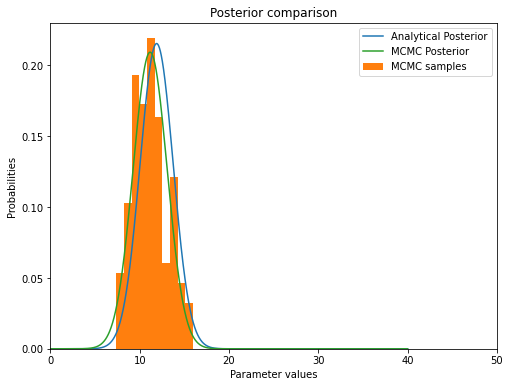

In [48]:
plt.figure(figsize=(8,6))

analy_posterior=posterior_calc(theta,prior,likelihood,solution='Analytical',mu_0=mu_0,sigma_0=sigma_0,sigma=sigma)
plt.plot(theta,analy_posterior,label='Analytical Posterior')  

sample_posterior=MCMC(X,theta,prior,sigma, prop_width=0.3,num_iter=1000)
plt.hist(sample_posterior, density=True, label='MCMC samples')
mu_mc=np.mean(sample_posterior)  #mean of the sampled values
sigma_mc=np.std(sample_posterior) #std of the sampled values
MCMC_posterior=f(theta,mu_mc,sigma_mc) #approximated normal distribution
plt.plot(theta,MCMC_posterior,label='MCMC Posterior')

plt.xlim(0,50)
plt.xlabel('Parameter values')
plt.ylabel('Probabilities')
plt.title('Posterior comparison')
plt.legend()
plt.show()

The above plot shows that the sampled distribution is a good approximator of the analytical distribution with most values in the area with the highest probability density. The mean and variance are also well approximated, but the peak of the distribution is away from the analytical value.

### Runtime and Accuracy

The KL divergence values are used here as a measure of how well the sampled posterior approximates the analytical posterior.

In [27]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)
    divergence=np.sum(np.where(a != 0, a * np.log(a / b), 0))
    
    return (divergence if divergence<100 else 100) #clipping the divergence value to prevent infinite values

In [28]:
import time
def convergence_check(X,theta,prior,sigma,true_post,iter_nums,prop_widths):
  times=[]  #storing the execution time
  kl_vals=[] #storing the kl divergence values
  post_list=[] #storing of posterior values
  for num in iter_nums:
    for width in prop_widths:
      tik=time.time()  #start time
      #since the posterior involves random sampling, the sampled values are averaged over 5 iterations for consistency
      for _ in range(5): 
          MCMC_post=MCMC(X,theta,prior,sigma,prop_width=width, num_iter=num) 
          mu_mc=np.mean(MCMC_post)   #mean of the sampled values
          sigma_mc=np.std(MCMC_post) #std of the sampled values
          post_list.append(f(theta,mu_mc,sigma_mc)) #approximated normal distribution
      tok=time.time() #stop time
      mean_post=np.mean(post_list,axis=0) #taking the average over the 5 iterations
      kl_vals.append(KL(true_post,mean_post)) #divergence between sampled and analytical posterior
      times.append((tok-tik)/5) #time is divided by 5 as we are calculating over 5 iterations

  return kl_vals,times

In [29]:
true_post=posterior_calc(theta,prior,likelihood,solution='Analytical',mu_0=mu_0,sigma_0=sigma_0,sigma=sigma,plot=False)

prop_widths=np.geomspace(0.1,10,num=30) #proposal width
iter_nums=[1000] #samples to be drawn - constant

kl_vals_prop,times_prop=convergence_check(X,theta,prior,sigma,true_post,iter_nums,prop_widths)

prop_widths=[1] #proposal width -constant
iter_nums=np.geomspace(100,10000,num=30, dtype=int) #samples to be drawn

kl_vals_iter,times_iter=convergence_check(X,theta,prior,sigma,true_post,iter_nums,prop_widths)

#### Plot on linear scale

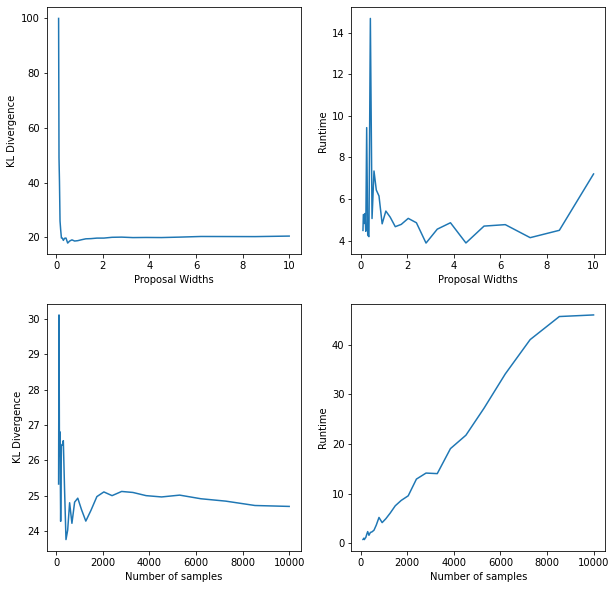

In [58]:
prop_widths=np.geomspace(0.1,10,num=30)

fig,axs=plt.subplots(2,2,figsize=(10,10))
x_axis=[prop_widths,iter_nums]
y_axis=[kl_vals_prop,times_prop,kl_vals_iter,times_iter]
x_labels=['Proposal Widths','Number of samples']
y_labels=['KL Divergence','Runtime']

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].plot(x_axis[i],y_axis[(i*2)+j])
        axs[i][j].set_ylabel(y_labels[j])
        axs[i][j].set_xlabel(x_labels[i])

#### Plot on log scale

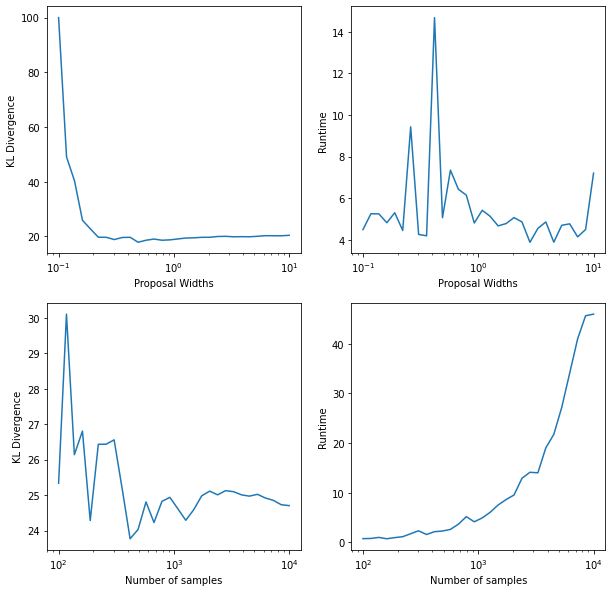

In [59]:
prop_widths=np.geomspace(0.1,10,num=30)

fig,axs=plt.subplots(2,2,figsize=(10,10))
x_axis=[prop_widths,iter_nums]
y_axis=[kl_vals_prop,times_prop,kl_vals_iter,times_iter]
x_labels=['Proposal Widths','Number of samples']
y_labels=['KL Divergence','Runtime']

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].plot(x_axis[i],y_axis[(i*2)+j])
        axs[i][j].set_ylabel(y_labels[j])
        axs[i][j].set_xlabel(x_labels[i])
        axs[i][j].set_xscale('log') #plot on log scale

The divergence from the analytical posterior seems to start off high and then decrease for increasing proposal widths.This could be explained by the fact that very small widths would lead to proposed moves in the distribution very close to the current position, therefore causing a loss of exploration in sampling.
The divergence from the analytical posterior seems to initially decrease and then increase for increasing sample sizes.  This is surprising as the number of samples is expected to have an inverse relationship with divergence.  
The runtime as expected, increases linearly with an increase in sample size. The runtime fluctuates with increasing proposal width, as it seems to be low initially, increases, drops off and starts to increase again with higer widths .  
The ideal number of samples is in the $10^2$ range, around 500, as the divergence starts to drop off and the runtime is low.  
The optimal proposal width is in the $10^{0}$ range, around 3/4, as the divergence is levelled off and runtime is low for the values.

### References

Jordan, M., 2021. The Conjugate Prior for the Normal Distribution. [online] People.eecs.berkeley.edu. Available at: <https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture5.pdf> [Accessed 30 October 2021].

KL Divergence- https://datascience.stackexchange.com/questions/9262/calculating-kl-divergence-in-python